# Tarefa - Álgebra Linear

A célula abaixo gera dados de notas de duas provas, p1 e p2, conforme em aula, mas com mais alunos.

## 1. Reduzindo correlações

a) Já vimos que expressar os dados através da média e diferença é uma transformação linear. Obtenha a média e a diferença através de uma multiplicação matricial, conforme visto em aula.

b) Calcule a correlação entre os dados da **p1** e **p2**

c) Calcule a correlação entre os dados transformados (média e diferença)

d) Comente as correlações observadas.

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Gerando os dados
np.random.seed(123)

p1 = np.random.random(50) *10
p1[p1>10] = 10
p1[p1<0] = 0

p2 = p1 + np.random.normal(0,1,50)
p2[p2>10] = 10
p2[p2<0] = 0

df = pd.DataFrame({'p1': p1, 'p2': p2})

### A

In [4]:
# Matriz de transformação
A = np.array([[0.5, 0.5], [0.5, -0.5]])

# Dados originais
data = df.values.T

# Transformação linear
transformed_data = A @ data

# Convertendo de volta para DataFrame
df_transformed = pd.DataFrame(transformed_data.T, columns=['mean', 'difference'])

print(df_transformed.head())


       mean  difference
0  7.454060   -0.489368
1  3.980465   -1.119072
2  1.621472    0.647043
3  4.993754    0.519394
4  8.066546   -0.871856


### B

In [6]:
correlation_p1_p2 = df['p1'].corr(df['p2'])
print(f'Correlação entre p1 e p2: {correlation_p1_p2}')

Correlação entre p1 e p2: 0.8957365818728046


### C

In [8]:
correlation_transformed = df_transformed['mean'].corr(df_transformed['difference'])
print(f'Correlação entre a média e a diferença: {correlation_transformed}')

Correlação entre a média e a diferença: -0.13347385411788837


### D

- **Correlação entre p1 e p2 (0.8957):** Este valor indica uma forte correlação positiva entre as notas das duas provas. Isso significa que, geralmente, se um aluno foi bem na primeira prova (p1), ele também foi bem na segunda prova (p2), e vice-versa. Essencialmente, as duas variáveis se movem na mesma direção - quando uma aumenta, a outra também tende a aumentar.

- **Correlação entre média e diferença (-0.1335):** Este valor é uma correlação negativa muito fraca entre a média e a diferença das notas transformadas. Isso mostra que, após a transformação linear para calcular a média e a diferença, a relação entre estas novas variáveis é praticamente inexistente. Esta transformação efetivamente reduz a dependência linear observada entre as variáveis originais. Em outras palavras, enquanto as notas individuais de p1 e p2 estavam fortemente correlacionadas, a média das notas e a diferença entre elas apresentam uma correlação mínima, resultando em dados que são muito menos relacionados linearmente.

## 2. Soma e diferença

Realize agora uma transformação semelhante, mas que ao invés da média, dê a soma da **p1** e **p2**. Construa o gráfico e conclua que diferenças visuais você observa.

In [16]:
# Matriz de transformação para soma e diferença
A = np.array([[1, 1], [1, -1]])

# Dados originais
data = df.values.T

# Transformação linear
transformed_data = A @ data

# Convertendo de volta para DataFrame
df_transformed = pd.DataFrame(transformed_data.T, columns=['sum', 'difference'])

print(df_transformed.head())

         sum  difference
0  14.908120   -0.978736
1   7.960930   -2.238143
2   3.242944    1.294085
3   9.987507    1.038788
4  16.133092   -1.743712


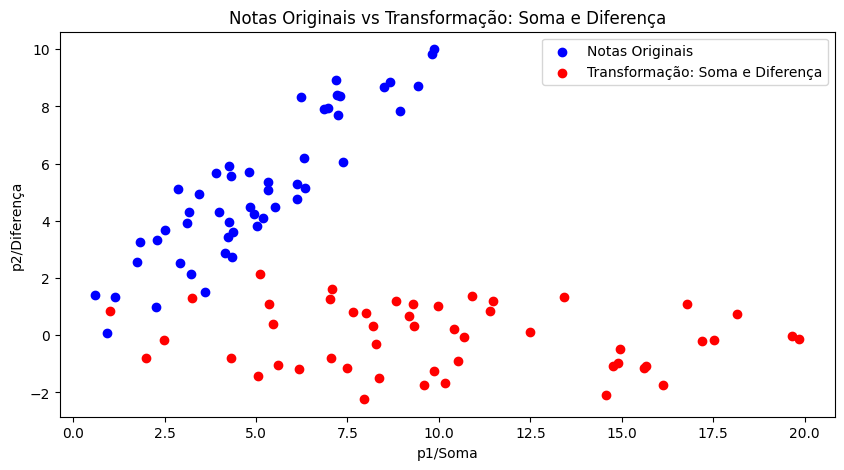

In [20]:
# Gráfico
plt.figure(figsize=(10, 5))

# Dados originais
plt.scatter(df['p1'], df['p2'], color='blue', label='Notas Originais')

# Dados transformados
plt.scatter(df_transformed['sum'], df_transformed['difference'], color='red', label='Transformação: Soma e Diferença')

plt.title('Notas Originais vs Transformação: Soma e Diferença')
plt.xlabel('p1/Soma')
plt.ylabel('p2/Diferença')
plt.legend()

plt.show()


## Análise dos Dados Originais e Transformados

### Sobre os Dados Originais (Azul):
1. **Dispersão e Variabilidade:**
   - Os dados originais mostram uma ampla variação tanto no eixo X quanto no eixo Y, indicando que as notas dos alunos nas provas P1 e P2 são bastante heterogêneas.
   - Isso reflete um cenário realista: há alunos com notas muito altas, outros com notas medianas e alguns com notas baixas em ambas as provas.

2. **Correlação Positiva:**
   - A clara tendência ascendente sugere que, em geral, os alunos que foram bem na prova P1 também tiveram um desempenho melhor na prova P2.
   - Isso pode indicar que o desempenho de um aluno não é completamente aleatório: fatores como conhecimento prévio ou dedicação podem influenciar ambas as provas.

---

### Sobre os Dados Transformados (Vermelho):
1. **Simplificação da Relação:**
   - A transformação (soma e diferença) parece ter "achatado" ou linearizado os dados. Isso torna mais fácil identificar padrões gerais ou aplicar modelos matemáticos que dependam de dados com menor variabilidade.

2. **Separação de Grupos:**
   - A transformação parece "desagrupar" os dados originais em padrões mais definidos. Isso sugere que ela pode ser útil para classificar os alunos com base em alguma métrica específica (como combinação de desempenho ou variação entre as provas).

---

### Conclusão Geral:
Os dados mostram que:
- Existe uma relação consistente entre as notas de P1 e P2 nos dados originais.
- A transformação ajuda a simplificar e realçar padrões nos dados, mas pode ocultar informações importantes.
- A escolha entre usar os dados originais ou transformados depende do objetivo da análise: se você está buscando padrões gerais, a transformação pode ser suficiente; mas se for necessário entender nuances individuais, os dados originais são mais adequados.
